# **GNCIPL Week 6 (Group 3)**

## **Topic name : (13) Flood Risk Prediction**

## **EDA using Python**

In [2]:
!pip install Folium

In [3]:
!pip install contextily geopandas


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/Colab Notebooks/GNCIPL Week 6/cleaned_flood_risk_prediction_risk_cat_dataset1 (1).csv"

Mounted at /content/drive


In [6]:
df = pd.read_csv(path, encoding="ISO-8859-1")
df_clean = df.copy()

In [7]:
print(df_clean.columns.tolist())
df_clean.info()


['date', 'latitude', 'longitude', 'city', 'flow_rate', 'river_level', 'rain_mm', 'temp_c', 'humidity_percentage', 'wind_speed_2m', 'wind_speed_10m', 'wind_direction_deg', 'landcover_class', 'elevation_m', 'impervious_percent', 'city_population', 'city_wise_pop_density', 'soil_texture_class', 'month', 'flow_rate_log', 'river_level_log', 'yest_rain_mm', 'yest_river_lvl', 'yest_flow_rate', '2day_b4_flow_rate', '3day_of_rain_mm', '7day_of_rain_mm', '7day_of_avg_river_lvl', '3day_of_avg_flow_rate', '7day_of_avg_flow_rate', 'pred_river_level_log', 'pred_flow_rate_log', 'risk_category']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29308 entries, 0 to 29307
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   29308 non-null  object 
 1   latitude               29308 non-null  float64
 2   longitude              29308 non-null  float64
 3   city                   29308 non-null  

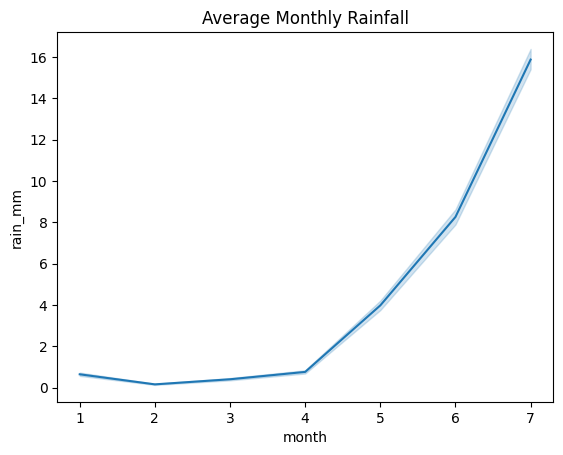

In [8]:
# rainfall over monoth
plt.figure()
sns.lineplot(x='month', y='rain_mm', data=df, estimator='mean')
plt.title("Average Monthly Rainfall")
plt.show()


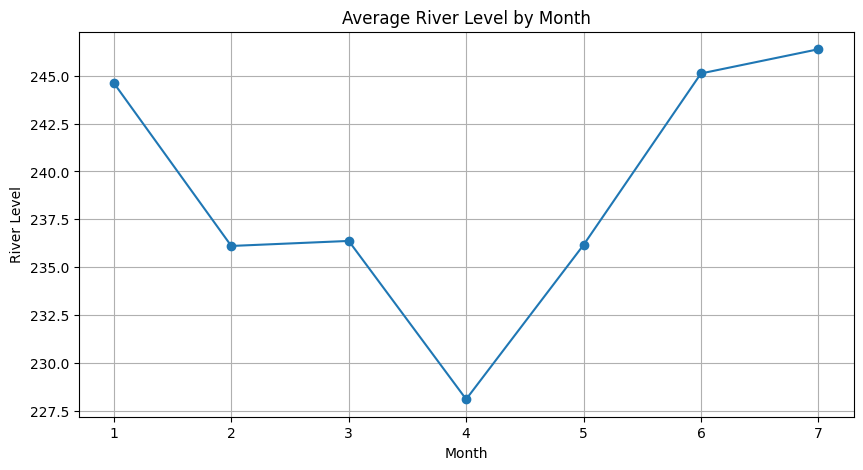

In [ ]:
# monthly river level trend

monthly_river = df.groupby('month')['river_level'].mean()

plt.figure(figsize=(10,5))
monthly_river.plot(marker='o')
plt.title("Average River Level by Month")
plt.xlabel("Month")
plt.ylabel("River Level")
plt.grid(True)
plt.show()





Top 8 Cities with Highest Average Rainfall:


,rain_mm
city,
Padyar,38.131364
Salebardi,31.739474
Suriya Buriya,27.445000
Ganod,23.321667
Bhatpalle,23.193571
Kanathur,20.523652
Kuanrdihi,19.200000
Jior,19.097391


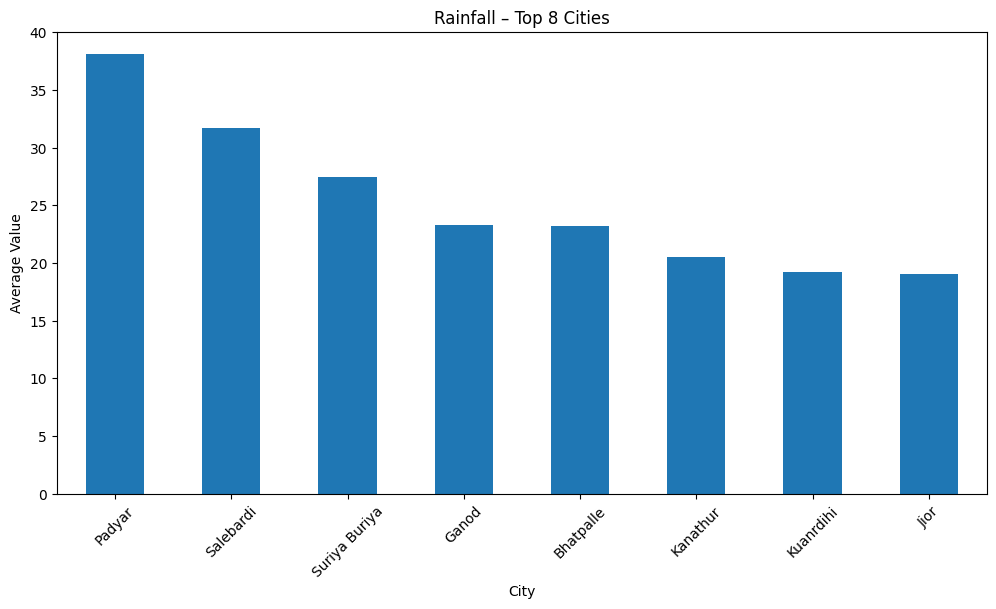

In [ ]:
# Top 8 cities based on rainfall
top8_cities = (
    df.groupby('city')['rain_mm']
    .mean()
    .sort_values(ascending=False) #by='rain_mm',
    .head(8)
)
print("Top 8 Cities with Highest Average Rainfall:")
display(top8_cities)
top8_cities.plot(kind='bar', figsize=(12,6))
plt.title("Rainfall – Top 8 Cities")
plt.ylabel("Average Value")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()



Top 8 Cities with Highest Average River Level:


,river_level
city,
Kavalikere,906.070141
Sakleshpura,888.173136
Mukundur Hosahalli,838.574937
Cauvery Road,812.089265
Kattemalalavadinala,767.096471
Mavathur Hantha,753.492736
Hariharapura,747.732136
Palvelicham,708.118313


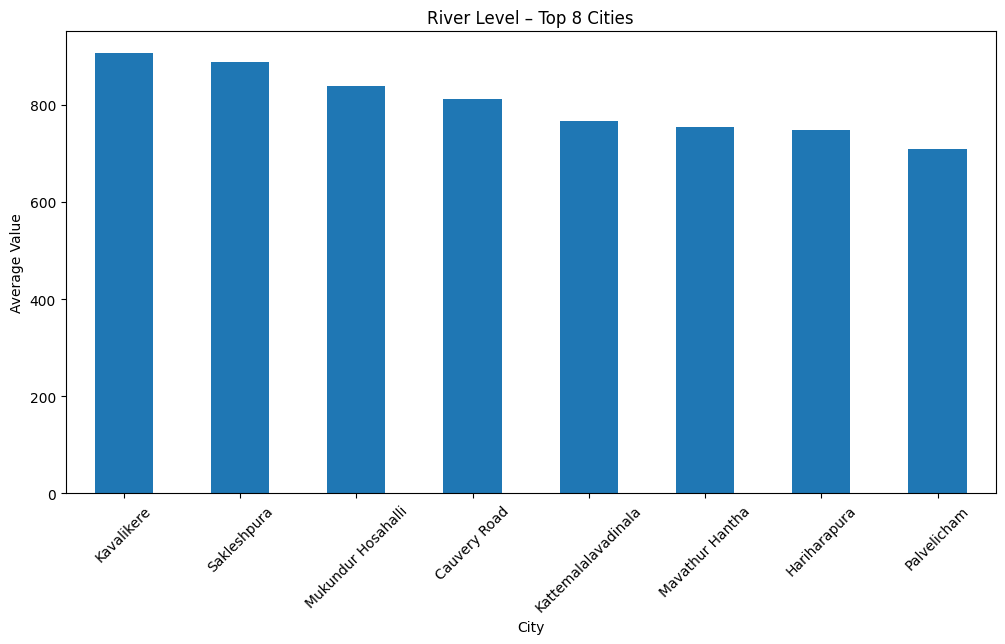

In [ ]:
# Top 8 cities based on both river level
top8_cities = (
    df.groupby('city')['river_level']
    .mean()
    .sort_values(ascending=False) #by='rain_mm',
    .head(8)
)
print("Top 8 Cities with Highest Average River Level:")
display(top8_cities)
top8_cities.plot(kind='bar', figsize=(12,6))
plt.title("River Level – Top 8 Cities")
plt.ylabel("Average Value")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()


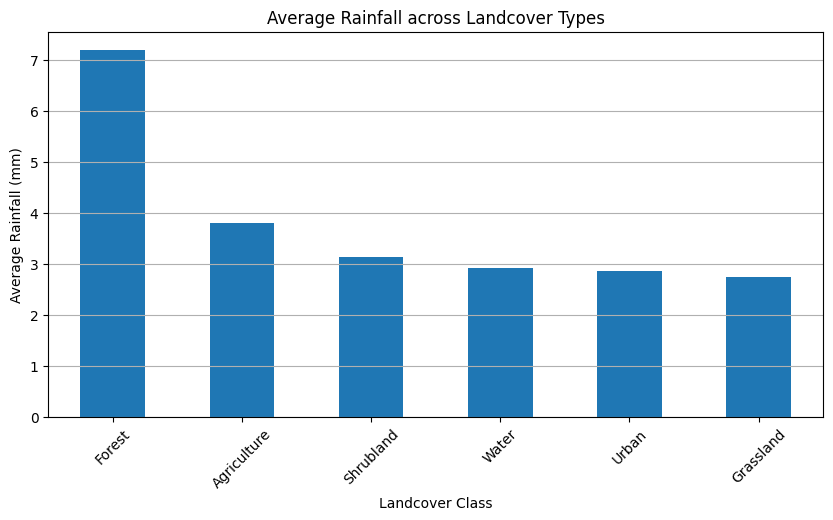

In [ ]:
#rainfall over Land calss
plt.figure(figsize=(10,5))

df.groupby('landcover_class')['rain_mm'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title("Average Rainfall across Landcover Types")
plt.xlabel("Landcover Class")
plt.ylabel("Average Rainfall (mm)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
# Real Map for Top 8 Cities Only

import folium

df_top = df[df['city'].isin(top8_cities.index)]

m = folium.Map(
    location=[df_top['latitude'].mean(), df_top['longitude'].mean()],
    zoom_start=6
)

for _, row in df_top.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"{row['city']} | Rain: {row['rain_mm']} | River: {row['river_level']}",
        color='red',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

m


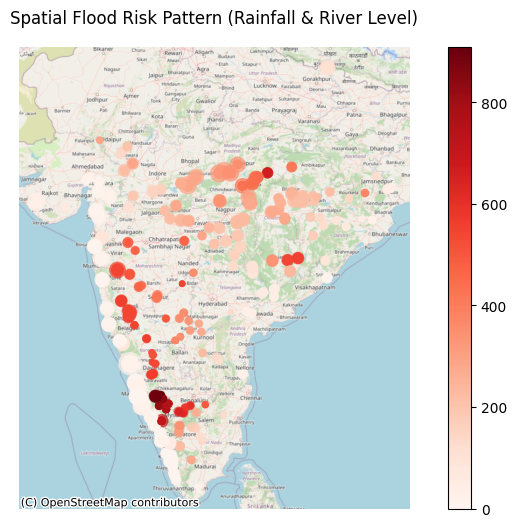

In [ ]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)
gdf_web = gdf.to_crs(epsg=3857)
plt.style.use('default')

fig, ax = plt.subplots(figsize=(10,6))
gdf_web.plot(
    ax=ax,
    alpha=0.6,
    column='river_level', # by colour
    cmap='Reds',
    legend=True,
    markersize=gdf_web['rain_mm'] # by size of bubble
)
ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik
)
ax.set_title("Spatial Flood Risk Pattern (Rainfall & River Level)")
ax.set_axis_off()
plt.show()


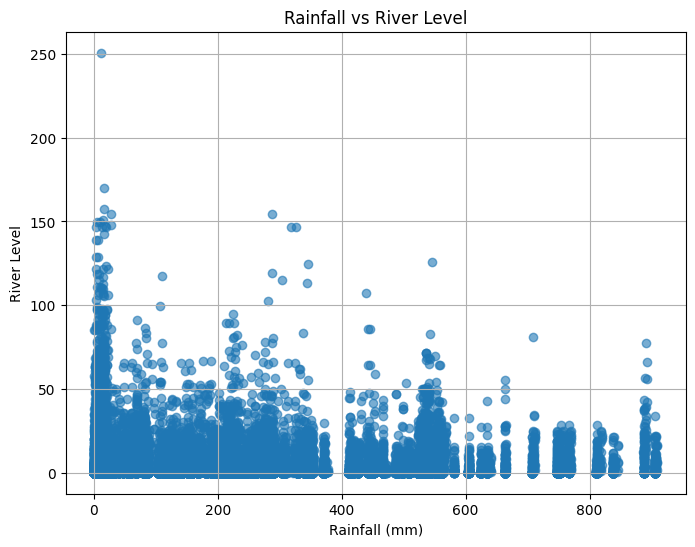

In [9]:
# Rainfall vs River level
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(
    df['river_level'],
    df['rain_mm'],
    alpha=0.6
)

plt.title("Rainfall vs River Level")
plt.xlabel("Rainfall (mm)")
plt.ylabel("River Level")
plt.grid(True)

plt.show()


# **ML visuals using python**

In [ ]:
df1 = df[df['risk_category'].isin(['Very High', 'High'])]

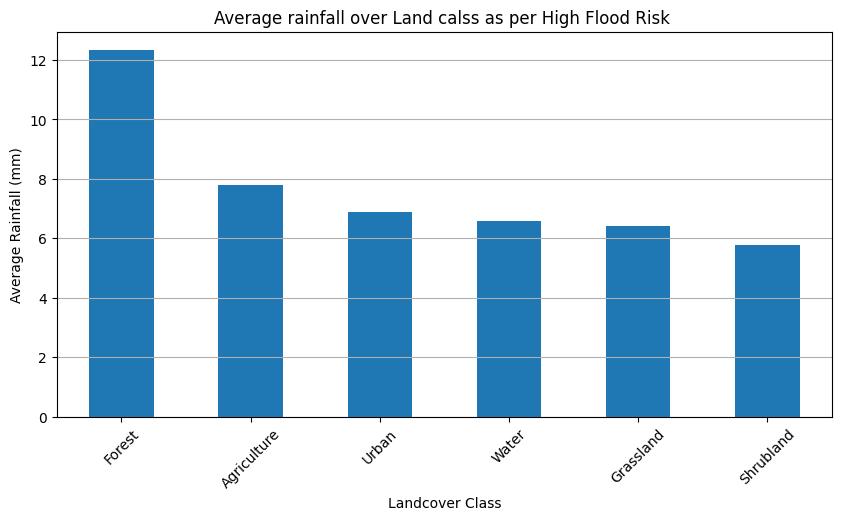

In [ ]:
#Avg rainfall over Land calss as per High Flood Risk
plt.figure(figsize=(10,5))

df1.groupby('landcover_class')['rain_mm'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title("Average rainfall over Land calss as per High Flood Risk ")
plt.xlabel("Landcover Class")
plt.ylabel("Average Rainfall (mm)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
